# Titanic

In [2]:
import cv2

♪───Ｏ（≧∇≦）Ｏ────♪

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.iloc[888]['Age']

nan

### iloc[]を基本使う．seriesを取得する．

In [6]:
df1 = df.iloc[:, 1]
type(df1)

pandas.core.series.Series

In [7]:
df2 = df['Age']
type(df2)

pandas.core.series.Series

### drop()
- dropしても元のdfは変更されない
- dfを変更したい時：inplace=Trueに

In [8]:
# df.drop(['Age', 'Cabin'], axis = 1, inspace=True)
# メモリ節約のために，元の変数に入れてメモリを使い回すのが普通だからこっちを推奨
df = pd.read_csv('titanic/train.csv')
df = df.drop(['Age', 'Cabin', 'Ticket'], axis=1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S


## フィルターのかけかた
**フィルタをかけてdescribe()とかで統計量をみる**

In [10]:
df[df['Survived']==1].describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,4.000000,5.000000,512.329200


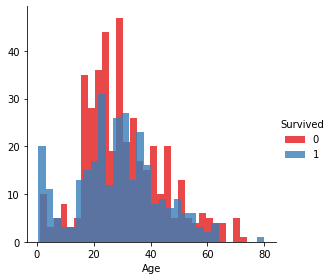

In [3]:
df = pd.read_csv('titanic/train.csv')
g = sns.FacetGrid(df, hue='Survived', palette='Set1', height=4, aspect=1)
g.map(plt.hist, 'Age', bins=30, alpha=0.8).add_legend()

In [23]:
g.savefig('images/titanic_s.png', dpi=100)

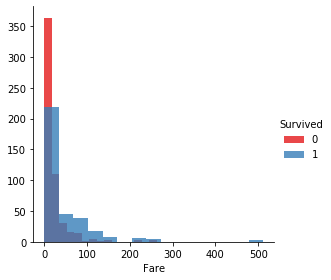

In [5]:
g = sns.FacetGrid(df, hue='Survived', palette='Set1', height=4, aspect=1)
g.map(plt.hist, 'Fare', bins=15, alpha=0.8).add_legend()

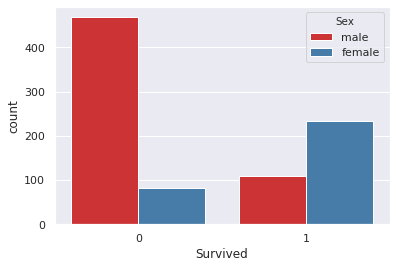

In [6]:
sns.set()
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')

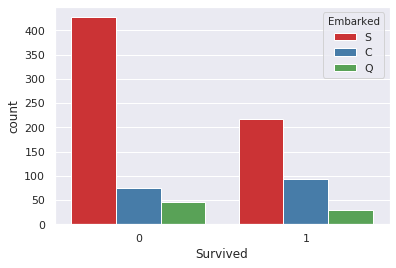

In [7]:
sns.countplot(x='Survived', hue='Embarked', data=df, palette='Set1')

## () & (), () | ()　複数条件でフィルタ可能

In [8]:
# 60歳以上の女性
df[(df['Age'] >= 60) & (df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [9]:
# 1stクラスまたは10歳未満
df[(df['Pclass']==1) | (df['Age']<10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(df['Age']).mean()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## gropby

![groupby](https://datawokagaku.com/wp-content/uploads/2020/02/groupby_overview.png)

In [13]:
gb = df.groupby('Pclass').mean()
gb

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,29.699118,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.699118,0.402174,0.380435,20.662183
3,439.154786,0.242363,29.699118,0.615071,0.393075,13.675550


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(gb)

gb=scaler.transform(gb)
gb

array([[ 1.35104524,  1.14023951,  0.92096627, -0.63118491, -1.32993444,
         1.40847942],
       [-0.31357295,  0.15437345,  0.49337479, -0.78040216,  0.24848699,
        -0.59406122],
       [-1.03747229, -1.29461296, -1.3814494 ,  1.41158708,  1.08144745,
        -0.8144182 ]])

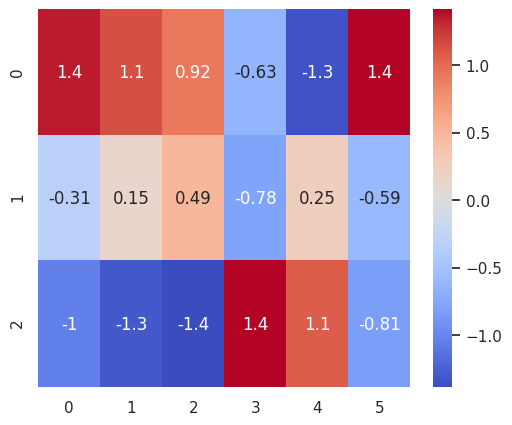

In [15]:
sns.set()
fig, ax = plt.subplots(figsize=(6,5), dpi=100)
ax = sns.heatmap(gb, cmap='coolwarm',annot=True)

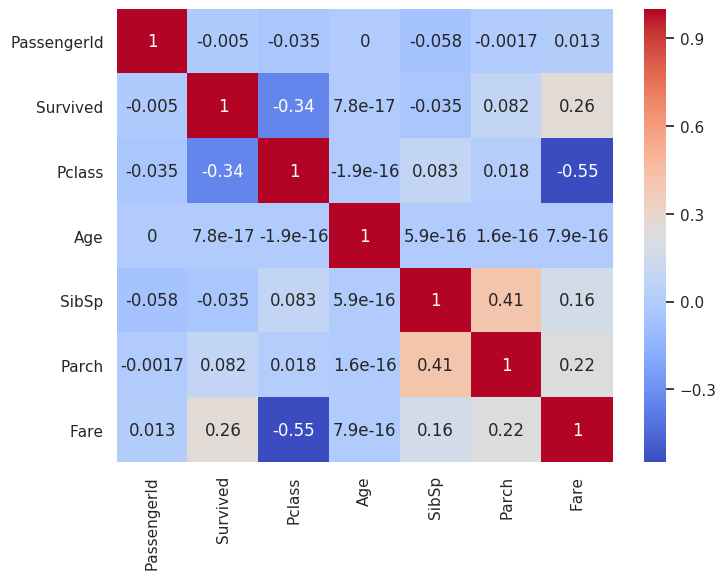

In [19]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [22]:
fig.savefig('images/heatmap.png')

In [24]:
df.groupby('Pclass').describe()

PassengerId                                                             \
             count        mean         std   min     25%    50%    75%    max   
Pclass                                                                          
1            216.0  461.597222  246.737616   2.0  270.75  472.0  670.5  890.0   
2            184.0  445.956522  250.852161  10.0  234.50  435.5  668.0  887.0   
3            491.0  439.154786  264.441453   1.0  200.00  432.0  666.5  891.0   

       Survived            ... Parch        Fare                             \
          count      mean  ...   75%  max  count       mean        std  min   
Pclass                     ...                                                
1         216.0  0.629630  ...   0.0  4.0  216.0  84.154687  78.380373  0.0   
2         184.0  0.472826  ...   1.0  3.0  184.0  20.662183  13.417399  0.0   
3         491.0  0.242363  ...   0.0  6.0  491.0  13.675550  11.778142  0.0   

                                           
             25%      50%   75%       max  
Pclass                                     
1       30.92395  60.2875  93.5  512.3292  
2       13.00000  14.2500  26.0   73.5000  
3        7.75000   8.0500  15.5   69.5500  

[3 rows x 48 columns]

In [25]:
# i: 1,2,3
# group_df: それぞれdataframeが格納されていく

for i, group_df in df.groupby('Pclass'):
    print(f"{i}: group_df's type is {type(group_df)} and has {len(group_df)}")
    

1: group_df's type is <class 'pandas.core.frame.DataFrame'> and has 216
2: group_df's type is <class 'pandas.core.frame.DataFrame'> and has 184
3: group_df's type is <class 'pandas.core.frame.DataFrame'> and has 491


# merge, join, concat

- concat: ガッちゃんこ
- merge: カラムをkeyにして横に結合

In [28]:
import pandas as pd
df1 = pd.DataFrame({ 'Key': ['k0', 'k1', 'k2'],
        'A': ['a0', 'a1', 'a2'],
        'B': ['b0', 'b1', 'b2']})
 
df2 = pd.DataFrame({ 'Key': ['k0', 'k1', 'k2'],
        'C': ['c0', 'c1', 'c2'],
        'D': ['d0', 'd1', 'd2']})
df1

,Key,C,D
0,k0,c0,d0
1,k1,c1,d1
2,k2,c2,d2


In [29]:
df2

,Key,C,D
0,k0,c0,d0
1,k1,c1,d1
2,k2,c2,d2


In [30]:
df1.merge(df2)

,Key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k1,a1,b1,c1,d1
2,k2,a2,b2,c2,d2


- how : どう結合するか→{‘left’, ‘right’, ‘outer’, ‘inner’}, デフォルトは ‘inner’
- on : keyにするカラムを指定（どちらのDataFrameにも存在するカラム）．指定をしないと共通のカラムで結合される
- left_on：leftのDataFrameのkeyにするカラム
- right_on：rightのDataFrameのkeyにするカラム
- left_index：leftのKeyをindexにする場合Trueを指定
- right_index：rightのKeyをindexにする場合Trueを指定
![image](https://datawokagaku.com/wp-content/uploads/2020/02/merge_overview.png)

**実際業務で結合する場合の多くが「大きな表に，小さな表を結合する」ケースです．**

どういうことかというと，例えば前回まで使っていたタイタニックのデータに対して，追加のデータとしてIDと他の情報(例えば英語を喋るか喋らないかのフラグなど，なんでもいいですが)を付け加えるケースです．

実業務ではほとんどがこのケースです．その追加のデータは，追加のカラム情報かもしれませんし，自分で加工して作ったデータかもしれません．

そのため，基本の考えとして「ベースの表を左において，追加の表を右から左にmergeするイメージ」が重要になってきます．

**よく使うのは’left’と’inner’です．ベースの表と追加の表の過不足がないことがわかっていればinnerを使うし，追加の表がベースの表より足りないケースは’left’を使います．**

# apply()

In [33]:
df = pd.DataFrame({ 'name': ['john', 'Mike', 'Emily'],
                    'age': ['23', '36', '42']})
df

,name,age
0,john,23
1,Mike,36
2,Emily,42


In [34]:
df['description'] = df.apply(lambda row: '{} is {} years old'.format(row['name'], row['age']), axis=1)
df

,name,age,description
0,john,23,john is 23 years old
1,Mike,36,Mike is 36 years old
2,Emily,42,Emily is 42 years old


# イテレーション：iterrows()
**for文みたいに繰り返すこと**

- .apply() では，各レコードの処理をした結果を別のカラムに保存するときに使い，今回の .iterows() では値を返すのではなく処理だけをしたいときに使うことが多いです．

In [37]:
# .iterrows() でイテレーションを回すと，各ループで(idx, row)というタプルに値が入ります．idxはindex, rowは各行のSeriesです
df = pd.read_csv('titanic/train.csv')
for idx, row in df.iterrows():
    if row['Age'] > 30 and row['Pclass'] == 3 and row['Sex'] == 'male' and row['Survived'] == 1:
        print(f"{row['Name']} is very lucky guy.")
    

Bing, Mr. Lee is very lucky guy.
Dahl, Mr. Karl Edwart is very lucky guy.
Niskanen, Mr. Juha is very lucky guy.
Sundman, Mr. Johan Julian is very lucky guy.
Pickard, Mr. Berk (Berk Trembisky) is very lucky guy.
Jonsson, Mr. Carl is very lucky guy.
Jussila, Mr. Eiriik is very lucky guy.
Stranden, Mr. Juho is very lucky guy.
Chip, Mr. Chang is very lucky guy.


# PDFで保存

In [39]:
x = np.linspace(-3, 3, 10)
y1 = np.exp(x)
y2 = np.exp(x)*2

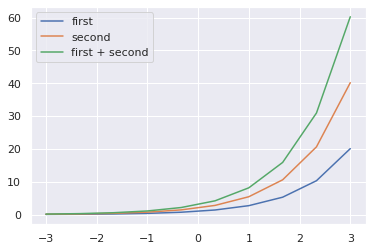

In [40]:
fig, axes = plt.subplots()
axes.plot(x, y1, label='first')
axes.plot(x, y2, label='second')
axes.plot(x, y1+y2, label='first + second')
axes.legend()

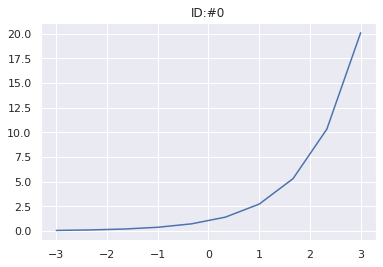

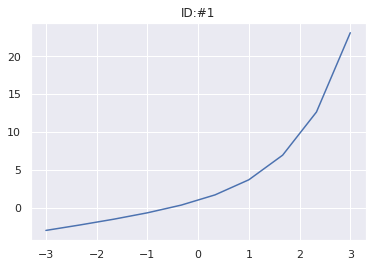

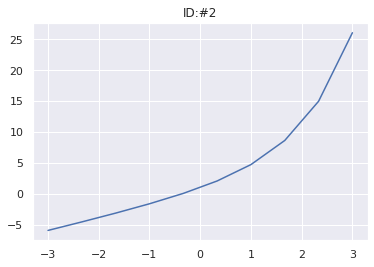

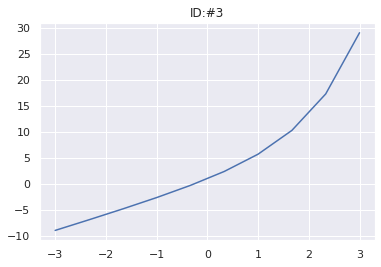

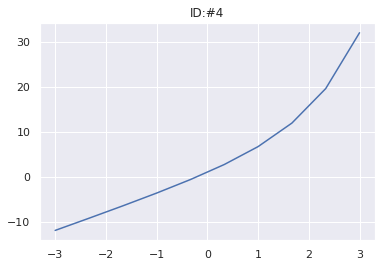

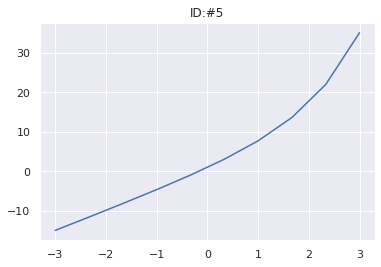

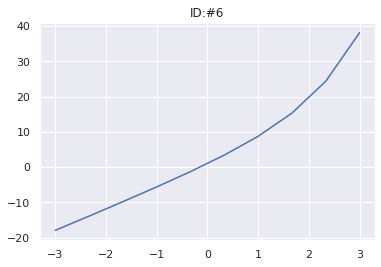

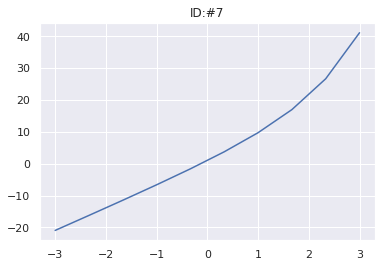

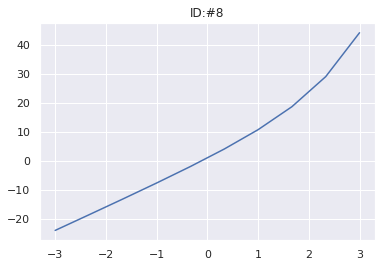

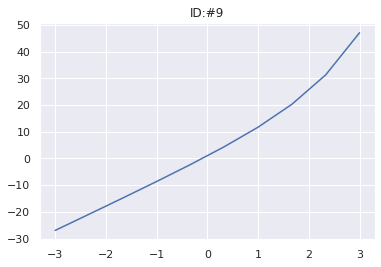

In [41]:
# PdfPagesをimport(覚える必要なし，コピペで使い回す)
from matplotlib.backends.backend_pdf import PdfPages

# pdfインスタンス作成．この時点でファイルができる
pdf = PdfPages('savemultifig_sample.pdf')

for i in range(0, 10):
    #------グラフ作成--------
    fig, axes = plt.subplots()
    #グラフの形状が徐々にかわるように設計しました．（適当です．）
    axes.plot(x, y1 + x*i)
    #タイトルをつけます．pdfで文字検索ができることを確認してください．
    axes.set_title('ID:#{}'.format(i))
    #-----------------------
 
    #forループのなかで保存
    pdf.savefig(fig)
 
#ループ後に閉じます
pdf.close()

In [3]:
# pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1 MB 1.1 MB/s eta 0:00:01    |██▏                             | 880 kB 276 kB/s eta 0:00:45     |██████▉                         | 2.8 MB 276 kB/s eta 0:00:38     |█████████████                   | 5.3 MB 2.7 MB/s eta 0:00:03     |██████████████████████          | 9.0 MB 2.7 MB/s eta 0:00:02     |█████████████████████████       | 10.3 MB 2.7 MB/s eta 0:00:02
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
Note: you may need to restart the kernel to use updated packages.
